## When do we use ?
<b>If there is suspicion that the missing value is not at random then capturing that information is important. In
this scenario, one would want to replace missing data with values that are at the tails of the distribution of
the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects
the missing data is valuable).<bR>
    
End of tail imputation is roughly equivalent to arbitrary value imputation, but it automatically selects the arbitrary values at the end of the variable distributions.</b>

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

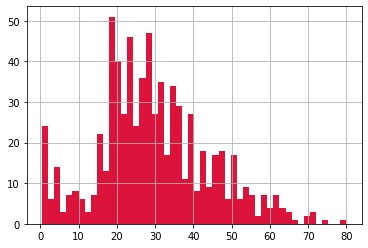

In [2]:
df.Age.hist(bins=50,color='crimson')

In [3]:
extreme=df.Age.mean()+3*df.Age.std()
extreme
#For Picking the value after the 3rd standard deviation

73.27860964406094

<AxesSubplot:xlabel='Age'>

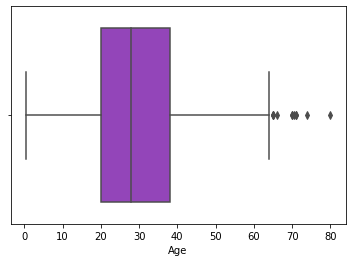

In [4]:
import seaborn as sns
sns.boxplot(x='Age',data=df,color='darkorchid')

In [5]:
def impute_nan(df,variable,median,extreme): # fun to replace nan value with extreme  value
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [6]:
impute_nan(df,'Age',df.Age.median(),extreme)


In [7]:
df.head(10)


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

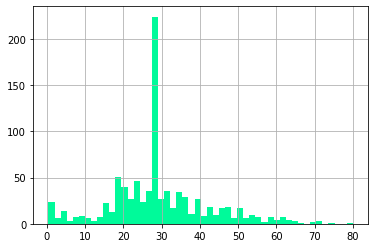

In [8]:
df['Age'].hist(bins=50,color='mediumspringgreen')

<AxesSubplot:>

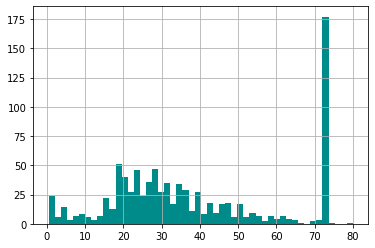

In [9]:
df['Age_end_distribution'].hist(bins=50,color='darkcyan')

<AxesSubplot:xlabel='Age_end_distribution'>

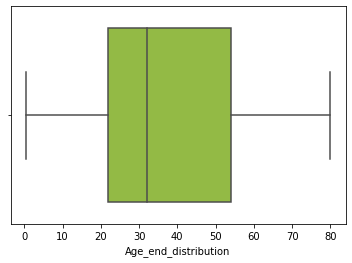

In [10]:
sns.boxplot(x='Age_end_distribution',data=df,color='yellowgreen')
#now you can see the outliers are considered as within the 3rd standard deviation from mean 

Text(0.5, 1.0, 'Age VS Age_end_distribution ')

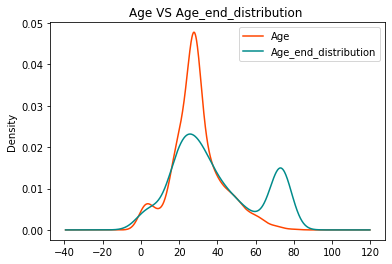

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='orangered')
df.Age_end_distribution.plot(kind='kde',ax=ax,color='darkcyan')
ax.legend(loc='best')
plt.title('Age VS Age_end_distribution ')